### Import

In [1]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix

### Fonts

In [4]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Download and prepare the CIFAR10 dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

### Sanity Check of the Data

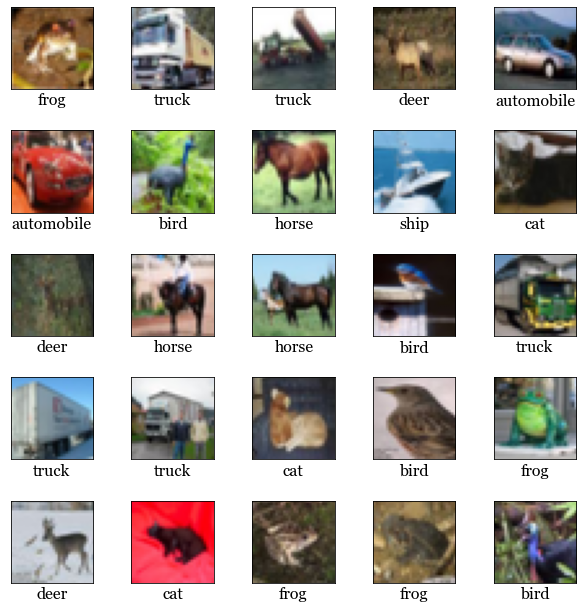

In [6]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
    plt.xlabel(class_names[train_labels[i][0]],**csfont,fontsize=16)

### Compute and Remove mean

In [8]:
mean_im = np.mean(train_images,axis=0)
mean_im = np.tile(mean_im,(train_images.shape[0],1,1,1))
train_images = train_images - mean_im
mean_im = np.mean(train_images,axis=0)
mean_im = np.tile(mean_im,(test_images.shape[0],1,1,1))
test_images = test_images - mean_im

### Create the network

In [14]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(14, activation='tanh'))
model.add(layers.Dense(12, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_25 (Dense)            (None, 20)                61460     
                                                                 
 dense_26 (Dense)            (None, 16)                336       
                                                                 
 dense_27 (Dense)            (None, 14)                238       
                                                                 
 dense_28 (Dense)            (None, 12)                180       
                                                                 
 dense_29 (Dense)            (None, 10)                130       
                                                                 
Total params: 62,344
Trainable params: 62,344
Non-trai

### Optimizer

In [15]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam');

### Compile and train the model

In [16]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit the Model

In [17]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1820 - accuracy: 0.1970 - val_loss: 2.3092 - val_accuracy: 0.1196
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1126 - accuracy: 0.2387 - val_loss: 2.2734 - val_accuracy: 0.1429
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0738 - accuracy: 0.2669 - val_loss: 2.2261 - val_accuracy: 0.1624
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0399 - accuracy: 0.2920 - val_loss: 2.2120 - val_accuracy: 0.1770
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0100 - accuracy: 0.3093 - val_loss: 2.1762 - val_accuracy: 0.1799
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9834 - accuracy: 0.3186 - val_loss: 2.1430 - val_accuracy: 0.1966
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9598 - accuracy: 0.3280 - val_loss: 2.1015 - val_accuracy:

### Predict

In [18]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)
y_pred = np.expand_dims(y_pred,-1)
C = confusion_matrix(test_labels,y_pred);

### Plot the loss and accuracy over training epochs

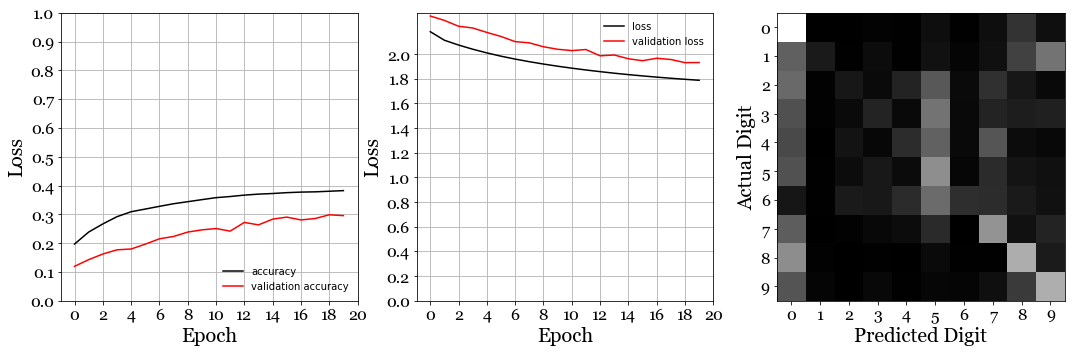

In [19]:
plt.figure(figsize=(14,4))
plt.subplots_adjust(left=0.0,bottom=0, right=1.0, top=1, wspace=0.2, hspace=0)
plt.subplot(1,3,1);
plt.plot(history.history['accuracy'], c='k',label='accuracy')
plt.plot(history.history['val_accuracy'],c='r', label = 'validation accuracy')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,1,11),np.round(np.linspace(0,1,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,20,11),np.linspace(0,20,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='lower right',frameon=False);
plt.subplot(1,3,2);
plt.plot(history.history['loss'], c='k', label='loss')
plt.plot(history.history['val_loss'], c='r',label = 'validation loss')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,2,11),np.round(np.linspace(0,2,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,20,11),np.linspace(0,20,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='upper right',frameon=False);
plt.subplot(1,3,3);
plt.imshow(C,cmap='gray');
plt.xlabel('Predicted Digit',**csfont,fontsize=20);
plt.ylabel('Actual Digit',**csfont,fontsize=20);
plt.xticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.yticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.savefig('../../assets/matplotlib/26-conventional-cifar.png', dpi=300,bbox_inches="tight")    